# Rozkład według wartości osobliwych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
import scipy

**Zadanie 1.**

Wykorzystanie rozkładu SVD do kompresji czarno-białych obrazków.

Obrazek w skali szarości to tablica pikseli. Jeżeli jasność/kolor pikseli wyrazimy w skali szarości, to taki obrazek możemy potraktować jako zwykłą macierz. A zatem możliwe jest przeprowadzenie rozkładu SVD takiego rysunku/zdjęcia. Rozkład taki można wykorzystać do skompresowania informacji zawartych w macierzy. W tym celu, po przeprowadzeniu rozkładu, wybieramy $n$ **największych wartości osobliwych oraz związane z nimi lewo- i prawostronne wektory osobliwe** i przybliżamy oryginalną macierz [iloczynem diadycznym](https://pl.wikipedia.org/wiki/Iloczyn_diadyczny) tych wartości (czyli macierzami rzędu 1.).

Przygotowanie danych (szczegóły na zajęciach z uczenia maszynowego)

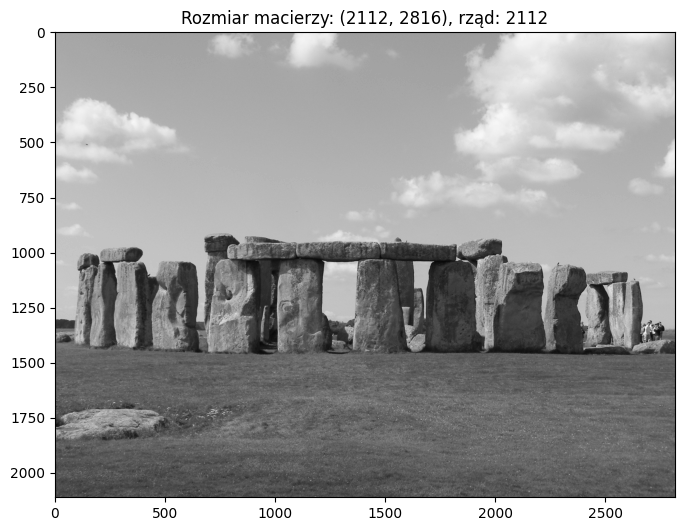

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/commons/3/3c/Stonehenge2007_07_30.jpg'

# import obrazka i konwersja do 2D
imag = io.imread(url)
imag = color.rgb2gray(imag)

plt.figure(figsize=(8,8))
plt.imshow(imag,cmap='gray')
plt.title(f'Rozmiar macierzy: {imag.shape}, rząd: {np.linalg.matrix_rank(imag)}')
plt.show()

**Rozkład SVD**

In [3]:
# rozkład według wartości osobliwych
U,s,Vt = np.linalg.svd(imag) # standardowo s jest wektorem wartości szczegółnych, a nie macierzą.

Informacja zapisana w pierwszej wartości szczególnej oraz związanych z nią wektorami lewo- i prawostronnym daje macierz o rzędzie 1. Wymiary tej macierzy odpowiadają wymiarom obrazka (wynika to z użycia iloczynu diadycznego).

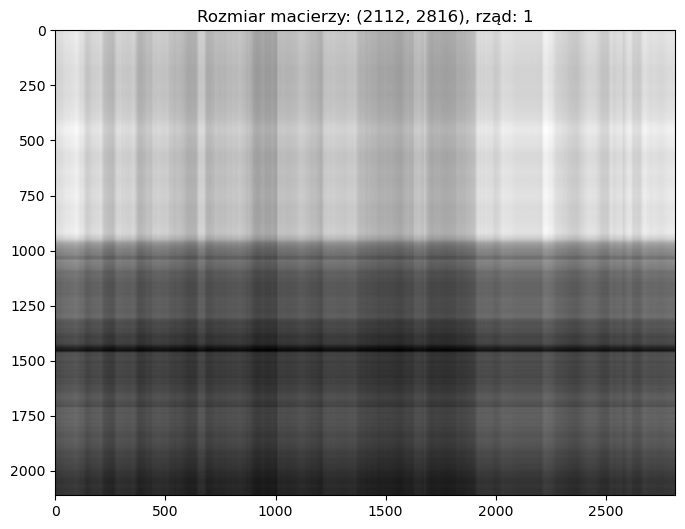

In [11]:
first = np.outer(U[:,0],Vt[0,:])*s[0]
plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {first.shape}, rząd: {np.linalg.matrix_rank(first)}')
plt.imshow(first,cmap='gray')

**Zadanie**

Wyświetl kilka pierwszych macierzy otrzymanych z iloczynów diadycznych kolejnych wartości osobliwych i związanych z nimi wektorów

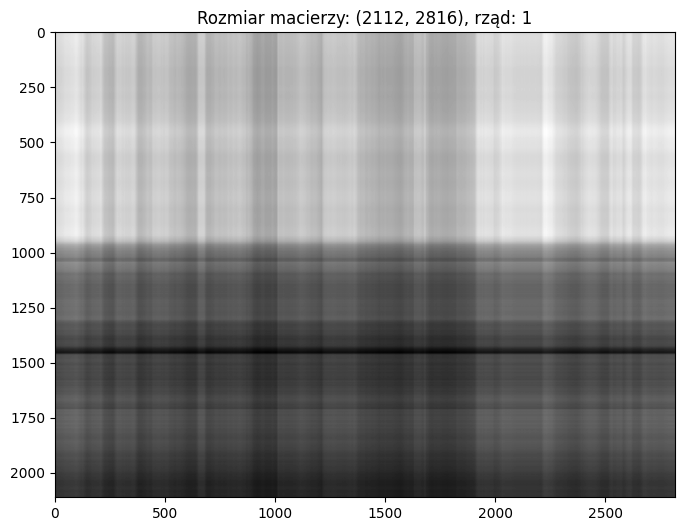

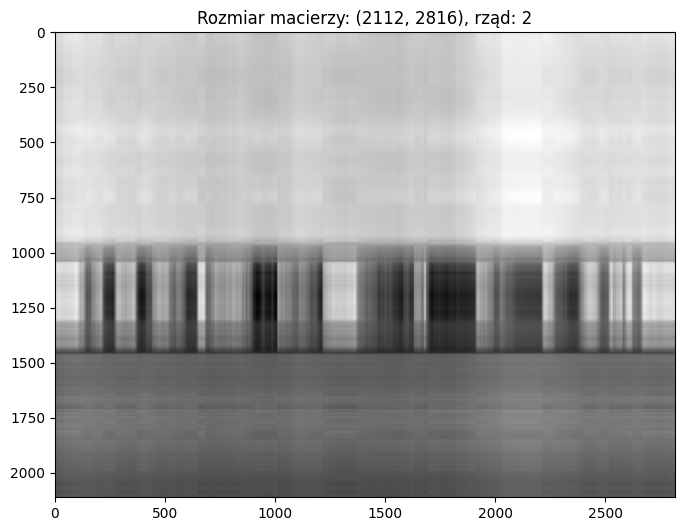

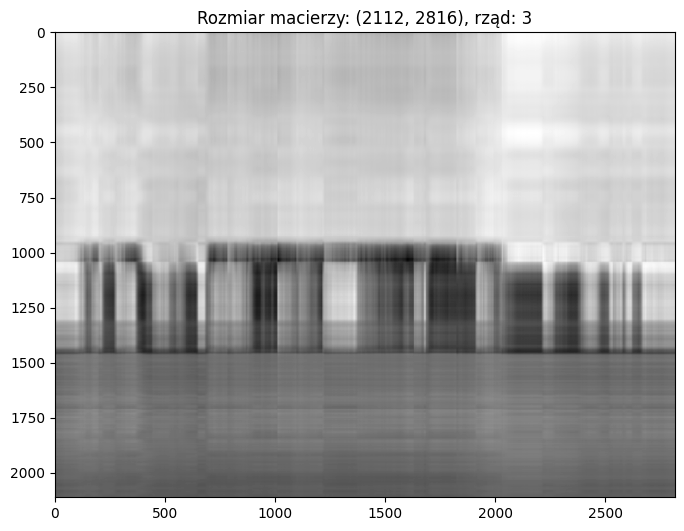

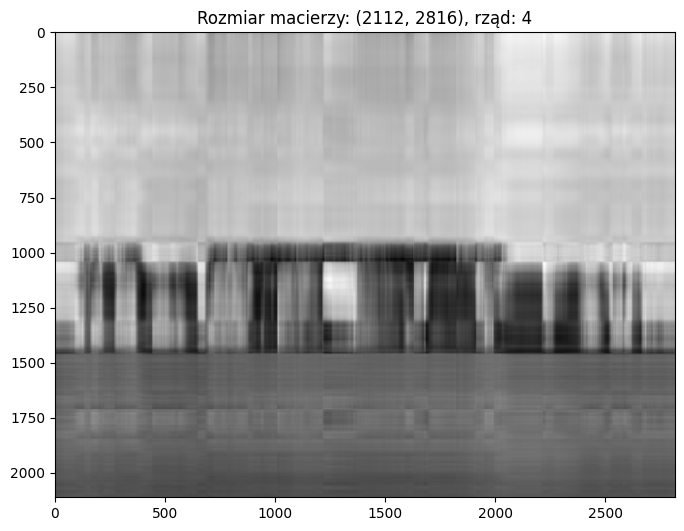

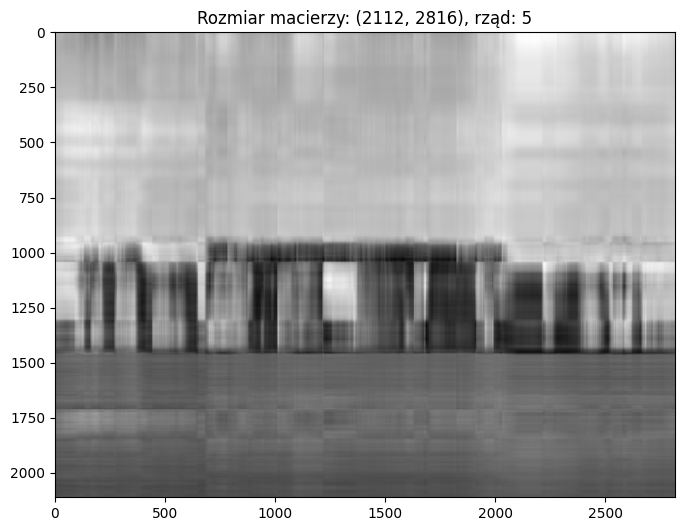

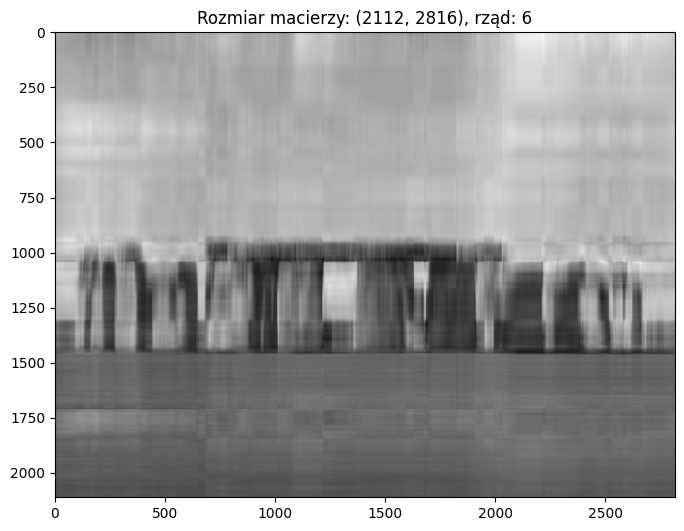

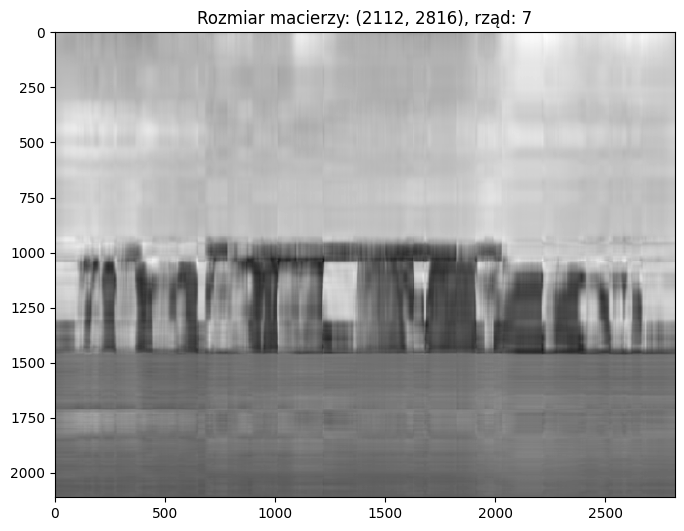

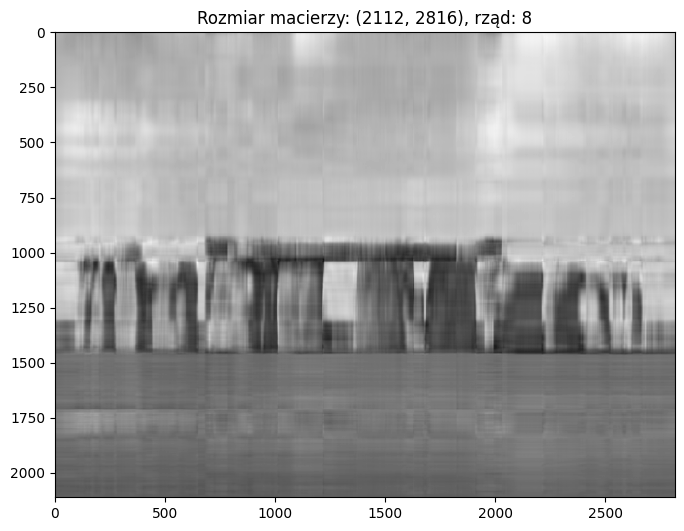

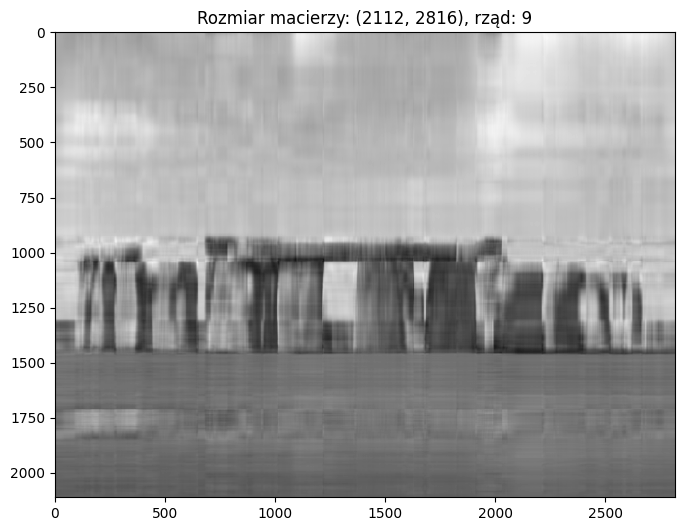

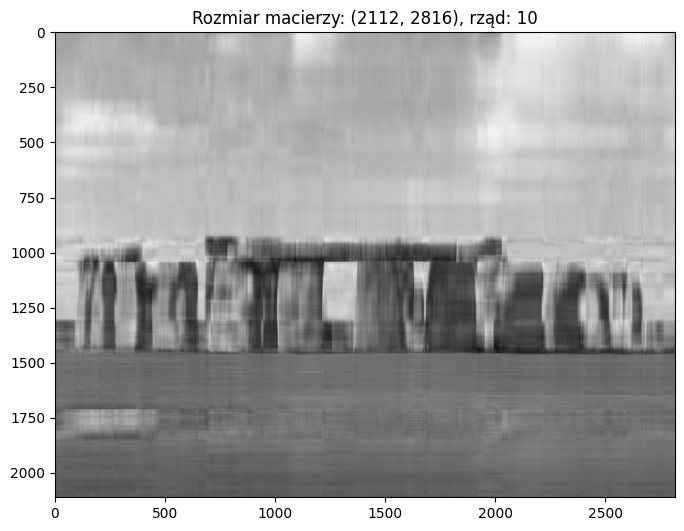

In [7]:
new_image = np.empty(imag.shape)

for i in range(10):
    new_image += np.outer(U[:,i],Vt[i,:])*s[i]
    plt.figure(figsize=(8,8))
    plt.title(f'Rozmiar macierzy: {new_image.shape}, rząd: {np.linalg.matrix_rank(new_image)}')
    plt.imshow(new_image,cmap='gray')

**Właściwa kompresja**

Aby przybliżyć oryginalny obrazek, musimy **dodać do siebie** kolejne macierze rzędu pierwszego 1. Poniżej suma pierwszych 5 takich macierzy.

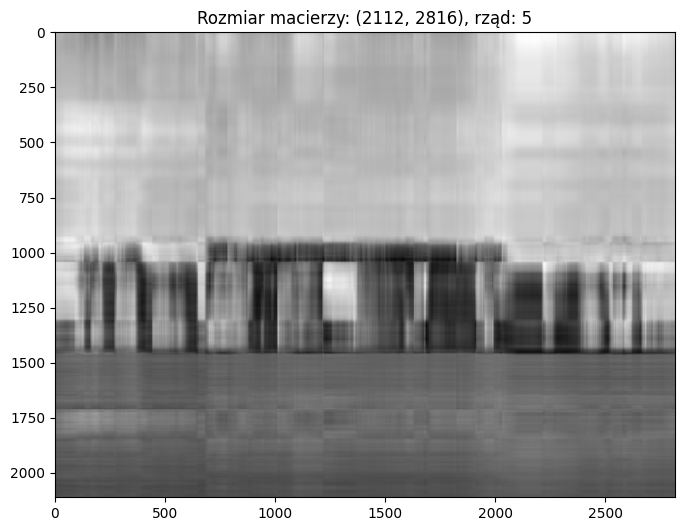

In [8]:
res = np.zeros(imag.shape)
for i in range(0,5):
    res += np.outer(U[:,i],Vt[i,:])*s[i]

plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res,cmap='gray')


**Zadanie**

Sprawdz rezultaty dla sumy mniejszej/większej liczby macierzy rzędu 1. Znajdź liczbę macierzy, dla której rozróżnienie przybliżenia od oryginału nie będzie możliwe (dla człowieka). Oblicz ile pamięci potrzeba do zapisania informacji niezbędnych do odtworzenia takiego przybliżenia (*pamiętaj, że zapamiętujemy wartości i wektory szczególne, a nie same macierze rzędu 1.*). Porównaj otrzymany wynik z rozmiarem org. obrazka. Jaki stopień kompresji udało Ci się osiągnąć?

In [54]:
def nth_rank_matrix(U: np.ndarray, s: np.ndarray, Vt: np.ndarray, n: int):
    res = np.zeros((U.size, Vt.size))
    for i in range(0, n):
        res += np.outer(U[:,i],Vt[i,:])*s[i]
    size = n*(U[:, 0].size+Vt[0, :].size+1)
    compression = (imag.size-size) / imag.size
    print(f"{size = }, {compression = }")
    return res

In [51]:
res = nth_rank_matrix(U, s, Vt, 500)
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res,cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(imag,cmap='gray')
plt.title(f'Rozmiar macierzy: {imag.shape}, rząd: {np.linalg.matrix_rank(imag)}')
plt.show()

ValueError: operands could not be broadcast together with shapes (1365,2048,3) (1365,2048) (1365,2048,3) 

**Zadanie**

Powtórz eksperyment dla innego zdjęcia/rysunku. Powyższy kod zadziała dla dowolnego obrazka w formacie jpg. Aby zmienić rysunek należy zmienić adres w zmiennej `url`. Spróbuj znaleźć obrazki, dla których wymagane jest zapamiętanie mniejszej ilości informacji (*wskazówka: poszukaj obrazków zawierających powtarzające się wzory*).

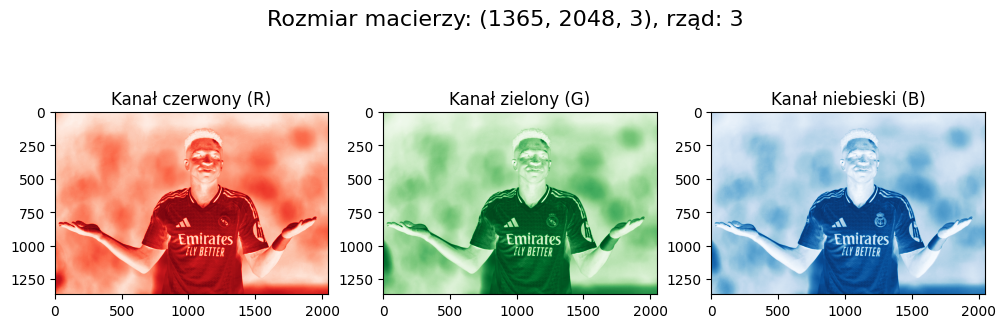

In [46]:
url = 'https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcSq1ZS-AAEry-_B6CRwGPSBmA9WA4aW8OEWRinIUiuf8jMorieL7LAC6CkLAfCjL4uSlp1hSeYmKW0N8qw'

imag = io.imread(url)
# imag = color.rgb2gray(imag)

plt.figure(figsize=(12, 4))

# Kanał czerwony
plt.subplot(1, 3, 1)
plt.imshow(imag[:, :, 0], cmap='Reds')
plt.title('Kanał czerwony (R)')

# Kanał zielony
plt.subplot(1, 3, 2)
plt.imshow(imag[:, :, 1], cmap='Greens')
plt.title('Kanał zielony (G)')

# Kanał niebieski
plt.subplot(1, 3, 3)
plt.imshow(imag[:, :, 2], cmap='Blues')
plt.title('Kanał niebieski (B)')

plt.suptitle(f'Rozmiar macierzy: {imag.shape}, rząd: {np.linalg.matrix_rank(imag.reshape(-1, imag.shape[2]))}', fontsize=16)
plt.show()

In [55]:
def rgb_nth_rank_matrix(imag:np.ndarray, n:int):
    res = np.zeros(imag.shape)
    for i in range(3):
        U,s,Vt = np.linalg.svd(imag[:,:,i])
        res += nth_rank_matrix(U, s, Vt, n)
    return res

In [56]:
res = rgb_nth_rank_matrix(imag, 500)
plt.figure(figsize=(8,8))
plt.title(f'Rozmiar macierzy: {res.shape}, rząd: {np.linalg.matrix_rank(res)}')
plt.imshow(res)

MemoryError: Unable to allocate 56.9 TiB for an array with shape (1863225, 4194304) and data type float64

**Zadanie**

Zastanów się nad bardziej poprawnymi (nie na oko) sposobami oceny jakości tej metody kompresji